### Прямоугольные антенны, диаметр 0.08 мм

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('data/coil_stat.xlsx')
rows = sorted([f'V{n}{d:02d}' for d in range(2, 11) for n in range(1, 12)])
rects = df.loc[(df['file'].isin(rows))]

%matplotlib inline


In [2]:
def plot_step_stat(dframe, step, wire, ax=None, color=''):
    res = dframe.loc[(dframe['step (mm)'] == step) & (dframe['wire_dia (mm)'] == wire)][['file', 'wire_len (cm)', 'coil_n', 'L, uH']]
    res = res.sort_values(['coil_n'], ascending=[1])
    ax = res.plot(x='coil_n', y='L, uH', title=f'проводник={wire} мм, шаг={step} мм', ax=ax, color=color, label=f'{step} мм')
    ax1 = ax.twiny()
    res.plot(x='wire_len (cm)', y='L, uH', ax=ax1, color=color)
    ax.grid(linestyle='--')
    ax.set_xlim(0, 12)
    ax.set_ylim(0, 25)
    ax1.set_xlim(0, 295)
    ax1.set_ylim(0, 25)
    ax1.set_xlabel('Длина проводника, см')
    ax1.lines = list()
    ax1.get_legend().remove()
    ax.set_ylabel('Индуктивность, мкГн')
    ax.set_xlabel('Кол-во витков')
    return ax, res

In [3]:
def plot_coil_n_stat(dframe, coil_n, wire, ax=None, color=''):
    res = dframe.loc[(dframe['coil_n'] == coil_n) & (dframe['wire_dia (mm)'] == wire)][['file', 'step (mm)', 'L, uH']]
    res = res.sort_values(['step (mm)'], ascending=[1])
    ax = res.plot(x='step (mm)', y='L, uH', title=f'проводник={wire} мм, кол-во витков={coil_n}', ax=ax, color=color, label=f'{coil_n} шт')
    ax.grid(linestyle='--')
    ax.set_xlim(0, 1.1)
    ax.set_ylim(0, 25)
    ax.set_ylabel('Индуктивность, мкГн')
    ax.set_xlabel('Шаг, мм')
    return ax, res

,file,wire_len (cm),coil_n,"L, uH"
20,V102,52.796,2.0,1.485
64,V202,76.766,3.0,2.656
82,V302,100.611,4.0,4.029
104,V402,124.296,5.0,5.899
135,V502,147.821,6.0,8.085
153,V602,172.347,7.0,10.385
171,V702,197.043,8.0,13.034
189,V802,221.901,9.0,16.017
207,V902,246.867,10.0,19.566
2,V1002,272.016,11.0,23.140


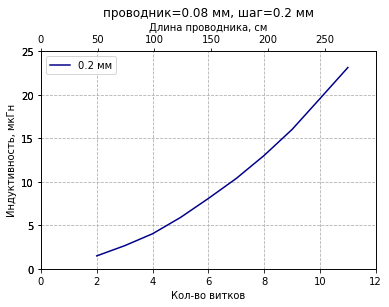

In [4]:
_, res = plot_step_stat(rects, step=0.2, wire=0.08, color='darkblue')
res

,file,wire_len (cm),coil_n,"L, uH"
22,V103,52.736,2.0,1.453
66,V203,76.546,3.0,2.561
84,V303,100.207,4.0,3.887
106,V403,123.598,5.0,5.551
137,V503,146.814,6.0,7.475
155,V603,171.342,7.0,9.669
173,V703,196.207,8.0,12.177
191,V803,221.270,9.0,14.964
209,V903,246.575,10.0,17.990
4,V1003,272.215,11.0,21.160


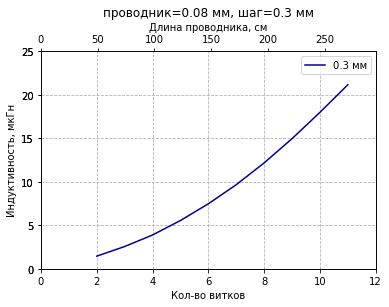

In [5]:
_, res = plot_step_stat(rects, step=0.3, wire=0.08, color='darkblue')
res

,file,wire_len (cm),coil_n,"L, uH"
24,V104,52.676,2.0,1.358
68,V204,76.413,3.0,2.232
86,V304,99.858,4.0,3.318
112,V404,122.903,5.0,5.223
139,V504,145.725,6.0,6.762
157,V604,170.757,7.0,8.975
175,V704,195.444,8.0,11.347
193,V804,220.527,9.0,13.850
211,V904,246.117,10.0,16.741
6,V1004,272.072,11.0,19.712


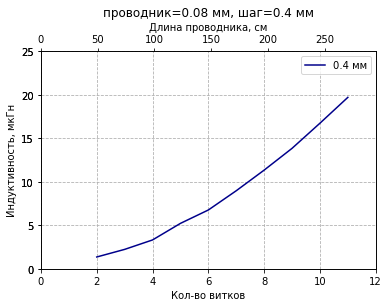

In [6]:
_, res = plot_step_stat(rects, step=0.4, wire=0.08, color='darkblue')
res

,file,wire_len (cm),coil_n,"L, uH"
26,V105,52.616,2.0,1.382
70,V205,76.194,3.0,2.263
88,V305,99.494,4.0,3.437
115,V405,122.217,5.0,5.118
141,V505,144.645,6.0,6.408
159,V605,169.258,7.0,8.561
177,V705,194.393,8.0,10.710
195,V805,219.948,9.0,13.064
213,V905,245.877,10.0,15.742
8,V1005,272.229,11.0,18.786


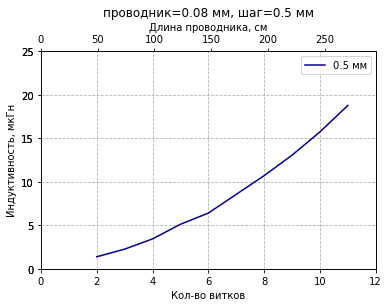

In [7]:
_, res = plot_step_stat(rects, step=0.5, wire=0.08, color='darkblue')
res

,file,wire_len (cm),coil_n,"L, uH"
28,V106,52.669,2.0,1.338
72,V206,76.397,3.0,2.062
94,V306,99.911,4.0,3.536
117,V406,122.953,5.0,4.916
143,V506,145.837,6.0,6.336
161,V606,170.950,7.0,8.359
179,V706,196.715,8.0,10.179
197,V806,223.036,9.0,12.904
215,V906,249.685,10.0,15.376
10,V1006,276.852,11.0,18.164


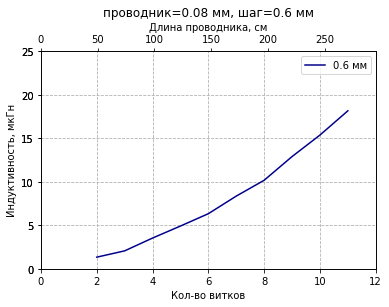

In [8]:
_, res = plot_step_stat(rects, step=0.6, wire=0.08, color='darkblue')
res

,file,wire_len (cm),coil_n,"L, uH"
30,V107,52.722,2.0,1.279
74,V207,76.596,3.0,2.372
96,V307,100.341,4.0,3.519
119,V407,123.854,5.0,4.823
145,V507,146.997,6.0,6.399
163,V607,172.654,7.0,8.145
181,V707,199.025,8.0,10.350
199,V807,225.860,9.0,12.650
217,V907,253.146,10.0,14.463
12,V1007,281.186,11.0,17.828


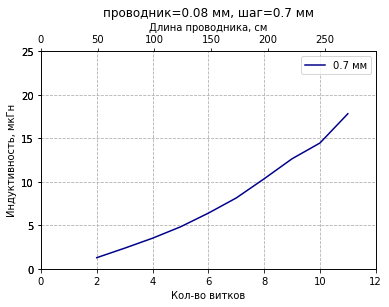

In [9]:
_, res = plot_step_stat(rects, step=0.7, wire=0.08, color='darkblue')
res

,file,wire_len (cm),coil_n,"L, uH"
32,V108,52.776,2.0,1.446
76,V208,76.787,3.0,2.305
98,V308,100.779,4.0,3.480
121,V408,124.618,5.0,4.784
147,V508,147.970,6.0,6.278
165,V608,174.271,7.0,7.877
183,V708,201.041,8.0,10.010
201,V808,228.583,9.0,12.307
219,V908,256.679,10.0,14.775
14,V1008,285.413,11.0,17.545


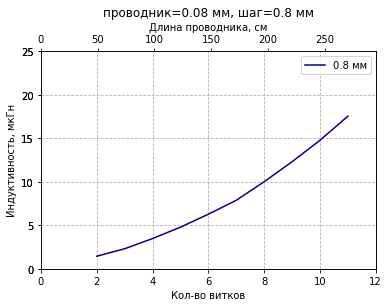

In [10]:
_, res = plot_step_stat(rects, step=0.8, wire=0.08, color='darkblue')
res

,file,wire_len (cm),coil_n,"L, uH"
34,V109,52.830,2.0,1.440
78,V209,77.035,3.0,2.234
100,V309,101.209,4.0,3.373
123,V409,125.274,5.0,4.712
149,V509,149.176,6.0,6.042
167,V609,175.922,7.0,7.865
185,V709,203.291,8.0,9.917
203,V809,231.433,9.0,11.833
221,V909,260.290,10.0,13.331
16,V1009,289.889,11.0,17.145


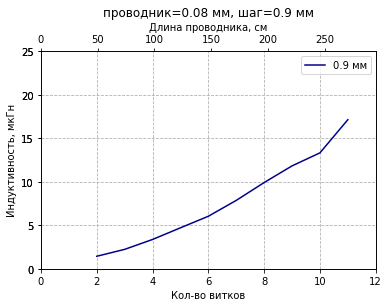

In [11]:
_, res = plot_step_stat(rects, step=0.9, wire=0.08, color='darkblue')
res

,file,wire_len (cm),coil_n,"L, uH"
36,V110,52.922,2.0,1.432
80,V210,77.237,3.0,2.263
102,V310,101.768,4.0,3.324
125,V410,126.105,5.0,4.615
151,V510,150.463,6.0,5.973
169,V610,177.601,7.0,7.790
187,V710,205.648,8.0,9.756
205,V810,234.368,9.0,11.938
223,V910,263.751,10.0,14.408
18,V1010,294.152,11.0,16.982


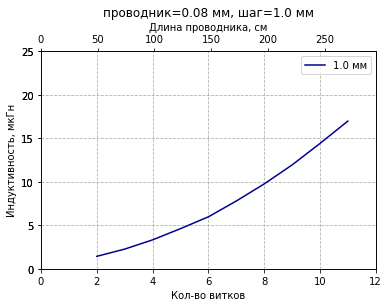

In [12]:
_, res = plot_step_stat(rects, step=1.0, wire=0.08, color='darkblue')
res

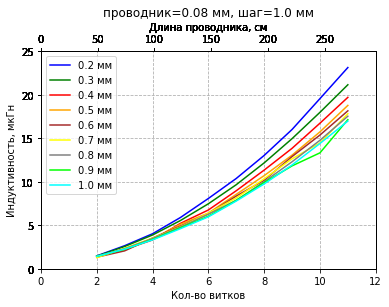

In [13]:
ax, _ = plot_step_stat(rects, step=0.2, wire=0.08, color='blue')
for st, col in zip([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], ['green', 'red', 'orange', 'brown', 'yellow', 'grey', 'lime', 'cyan']):
    plot_step_stat(rects, step=st, wire=0.08, color=col, ax=ax)

,file,step (mm),"L, uH"
20,V102,0.2,1.485
22,V103,0.3,1.453
24,V104,0.4,1.358
26,V105,0.5,1.382
28,V106,0.6,1.338
30,V107,0.7,1.279
32,V108,0.8,1.446
34,V109,0.9,1.440
36,V110,1.0,1.432


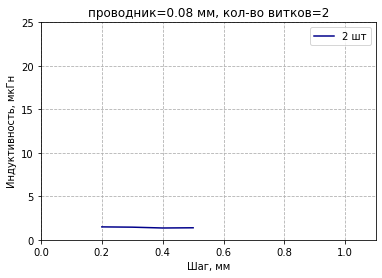

In [14]:
_, res = plot_coil_n_stat(rects, coil_n=2, wire=0.08, color='darkblue')
res

,file,step (mm),"L, uH"
64,V202,0.2,2.656
66,V203,0.3,2.561
68,V204,0.4,2.232
70,V205,0.5,2.263
72,V206,0.6,2.062
74,V207,0.7,2.372
76,V208,0.8,2.305
78,V209,0.9,2.234
80,V210,1.0,2.263


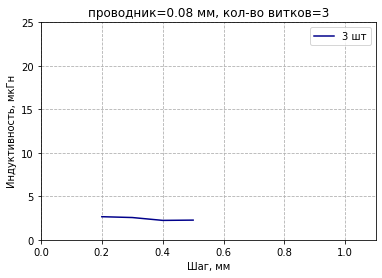

In [15]:
_, res = plot_coil_n_stat(rects, coil_n=3, wire=0.08, color='darkblue')
res

,file,step (mm),"L, uH"
82,V302,0.2,4.029
84,V303,0.3,3.887
86,V304,0.4,3.318
88,V305,0.5,3.437
94,V306,0.6,3.536
96,V307,0.7,3.519
98,V308,0.8,3.480
100,V309,0.9,3.373
102,V310,1.0,3.324


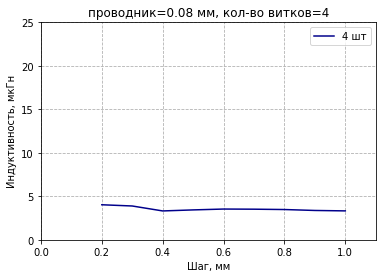

In [16]:
_, res = plot_coil_n_stat(rects, coil_n=4, wire=0.08, color='darkblue')
res

,file,step (mm),"L, uH"
104,V402,0.2,5.899
106,V403,0.3,5.551
112,V404,0.4,5.223
115,V405,0.5,5.118
117,V406,0.6,4.916
119,V407,0.7,4.823
121,V408,0.8,4.784
123,V409,0.9,4.712
125,V410,1.0,4.615


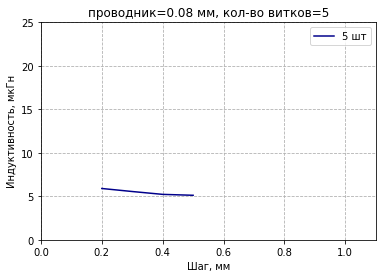

In [17]:
_, res = plot_coil_n_stat(rects, coil_n=5, wire=0.08, color='darkblue')
res

,file,step (mm),"L, uH"
135,V502,0.2,8.085
137,V503,0.3,7.475
139,V504,0.4,6.762
141,V505,0.5,6.408
143,V506,0.6,6.336
145,V507,0.7,6.399
147,V508,0.8,6.278
149,V509,0.9,6.042
151,V510,1.0,5.973


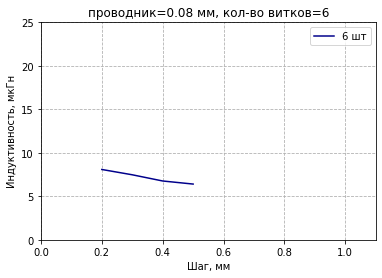

In [18]:
_, res = plot_coil_n_stat(rects, coil_n=6, wire=0.08, color='darkblue')
res

,file,step (mm),"L, uH"
153,V602,0.2,10.385
155,V603,0.3,9.669
157,V604,0.4,8.975
159,V605,0.5,8.561
161,V606,0.6,8.359
163,V607,0.7,8.145
165,V608,0.8,7.877
167,V609,0.9,7.865
169,V610,1.0,7.790


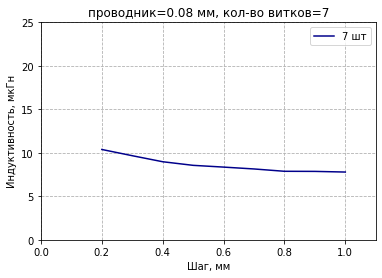

In [19]:
_, res = plot_coil_n_stat(rects, coil_n=7, wire=0.08, color='darkblue')
res

,file,step (mm),"L, uH"
171,V702,0.2,13.034
173,V703,0.3,12.177
175,V704,0.4,11.347
177,V705,0.5,10.710
179,V706,0.6,10.179
181,V707,0.7,10.350
183,V708,0.8,10.010
185,V709,0.9,9.917
187,V710,1.0,9.756


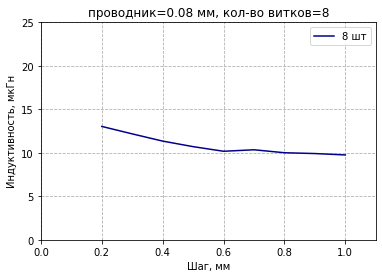

In [20]:
_, res = plot_coil_n_stat(rects, coil_n=8, wire=0.08, color='darkblue')
res

,file,step (mm),"L, uH"
189,V802,0.2,16.017
191,V803,0.3,14.964
193,V804,0.4,13.850
195,V805,0.5,13.064
197,V806,0.6,12.904
199,V807,0.7,12.650
201,V808,0.8,12.307
203,V809,0.9,11.833
205,V810,1.0,11.938


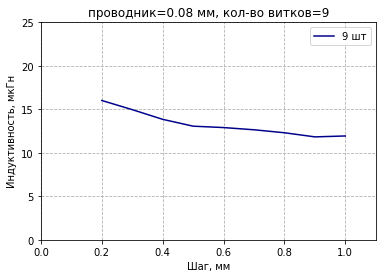

In [21]:
_, res = plot_coil_n_stat(rects, coil_n=9, wire=0.08, color='darkblue')
res

,file,step (mm),"L, uH"
207,V902,0.2,19.566
209,V903,0.3,17.990
211,V904,0.4,16.741
213,V905,0.5,15.742
215,V906,0.6,15.376
217,V907,0.7,14.463
219,V908,0.8,14.775
221,V909,0.9,13.331
223,V910,1.0,14.408


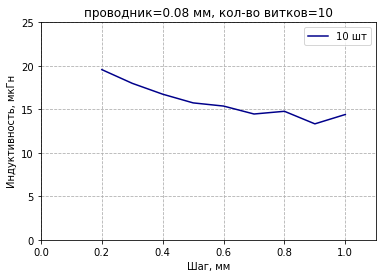

In [22]:
_, res = plot_coil_n_stat(rects, coil_n=10, wire=0.08, color='darkblue')
res

,file,step (mm),"L, uH"
2,V1002,0.2,23.140
4,V1003,0.3,21.160
6,V1004,0.4,19.712
8,V1005,0.5,18.786
10,V1006,0.6,18.164
12,V1007,0.7,17.828
14,V1008,0.8,17.545
16,V1009,0.9,17.145
18,V1010,1.0,16.982


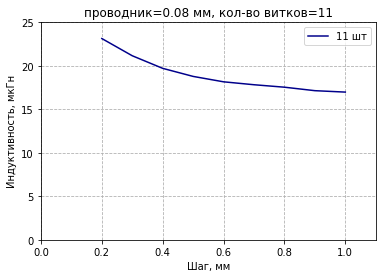

In [23]:
_, res = plot_coil_n_stat(rects, coil_n=11, wire=0.08, color='darkblue')
res

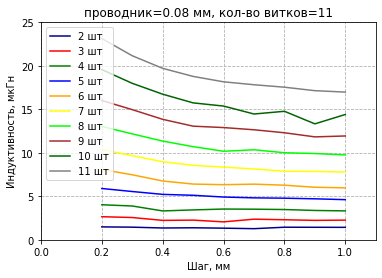

In [24]:
ax, res = plot_coil_n_stat(rects, coil_n=2, wire=0.08, color='darkblue')
for st, col in zip(range(3, 12), ['red', 'green', 'blue', 'orange', 'yellow', 'lime', 'brown', 'darkgreen', 'grey']):
    plot_coil_n_stat(rects, coil_n=st, wire=0.08, ax=ax, color=col)